In [77]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import re
import os
import math

In [79]:
quidsDatta= pd.read_csv('/content/gdrive/MyDrive/IR-assignments/IR-assignment-2-data.csv',sep=' ',header=None)


In [80]:
print(quidsDatta.shape)

(239093, 139)


In [81]:
quidFour = quidsDatta[0:103].copy()



In [82]:
quidFour

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:35,129:1,130:153,131:4872,132:9,133:55,134:0,135:0,136:0,NaN
99,1,qid:4,1:3,2:0,3:3,4:2,5:3,6:1,7:0,8:1,...,128:367,129:6,130:153,131:2383,132:18,133:99,134:0,135:16,136:11.3166666666667,NaN
100,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:49182,131:26966,132:15,133:69,134:0,135:193,136:21.9355595468361,NaN
101,1,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:1,130:42877,131:26562,132:12,133:24,134:0,135:56,136:62.9206042323688,NaN


# Rearrangement of Query-Url pairs

In [83]:
quidFour.shape[0]

103

In [84]:
dcg_Vales = []

In [85]:
for curRow in range(quidFour.shape[0]):
  currQuiStr = quidFour.iloc[curRow][0]
  dcg_Vales.append(currQuiStr)

In [86]:
print(dcg_Vales)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]


#Part 2

In [87]:
newDatta_Part1 = quidFour.copy()


In [88]:
newDatta_Part1 = newDatta_Part1.sort_values(by=[0], ascending=False)

In [89]:
newDatta_Part1

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:8,129:0,130:868,131:9260,132:246,133:88,134:0,135:0,136:0,NaN
43,0,qid:4,1:2,2:0,3:0,4:0,5:2,6:0.666667,7:0,8:0,...,128:4,129:0,130:797,131:9260,132:237,133:80,134:0,135:0,136:0,NaN
42,0,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:83,129:5,130:144,131:262,132:157,133:179,134:0,135:0,136:0,NaN
41,0,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:195,129:8,130:124,131:206,132:103,133:121,134:0,135:0,136:0,NaN


# Saving the max DCG file

In [90]:
newDatta_Part1.to_csv('Q2Part2.csv',index=False)

# How many such files will be There ?

In [91]:
import collections
collections.Counter(dcg_Vales)

Counter({0: 59, 1: 26, 2: 17, 3: 1})

In [92]:
def givemyFact(num):
	if num==0 or num==1:
		return 1
	else:
		return num*givemyFact(num-1)

In [93]:
myWay1 = givemyFact(1) # for 3
myWay2 = givemyFact(17)# for 2
myWay3 = givemyFact(26)# for 1
myWay4 = givemyFact(59) #for 0 


In [94]:
totalSuchFiles = myWay1 * myWay2 * myWay3 * myWay4 
print(totalSuchFiles)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


# Total such files can be 
# 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

In [95]:
sorted_Vales = dcg_Vales.copy()
sorted_Vales_50 = dcg_Vales.copy()
sv_50 = sorted_Vales_50[0:50]
#copies in the sorted_Vales

In [96]:
print(sorted_Vales)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]


In [97]:
sorted_Vales.sort(reverse=True)
sv_50.sort(reverse=True)

In [98]:
print(sorted_Vales)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [99]:
print(sv_50)


[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [100]:
def determineNdcg(vales):
  adder = vales[0] + vales[1]
  for idx in range(2,len(vales)-1):
    adder += vales[idx]/math.log2(idx+1)
  return adder


# Part 3

# a)50

In [101]:
dcg_Vales1 = dcg_Vales.copy()
sorted_Vales1 = sv_50.copy()

In [102]:
dcgOne= dcg_Vales1[0:50]
idcgOne = sorted_Vales1[0:50]

In [103]:
print(dcgOne)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [104]:
print(idcgOne)

[3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [105]:
dcgWall_50 = determineNdcg(dcgOne)
idcgWall_50 = determineNdcg(idcgOne)
print(dcgWall_50/idcgWall_50)

0.5253808413557646


In [106]:
print(dcgWall_50)
print(idcgWall_50)

7.390580969258021
14.067092644997018


# Ndcg for the first 50 is 0.5253808413557646

# b)for the whole Dataset

In [107]:
dcg_Vales2 = dcg_Vales.copy()
sorted_Vales2 = sorted_Vales.copy()


In [108]:
dcgWall = determineNdcg(dcg_Vales2)
idcgWall = determineNdcg(sorted_Vales2)
print(dcgWall/idcgWall)

0.5979226516897831


# Ndcg for the whole dataset is 0.5979

# Part 4

In [109]:
import matplotlib.pyplot as plt

In [110]:
graph4 = quidFour.copy()

In [111]:
relvanceDict = {}
relevantDocs = 0



In [112]:
graph4[:][76]

0        75:90.53171
1      75:538.388954
2       75:88.171761
3      75:144.564444
4      75:142.589323
           ...      
98      75:70.460443
99      75:270.13233
100    75:296.023694
101    75:528.520116
102     75:84.625987
Name: 76, Length: 103, dtype: object

In [113]:
relevanceScore = []
for idx in range(len(graph4)):
  currVal = graph4.iloc[idx][76]
  currVal = currVal[3:]
  relevanceScore.append(float(currVal))


In [114]:
print(relevanceScore)

[90.53171, 538.388954, 88.171761, 144.564444, 142.589323, 463.099129, 103.400313, 411.010633, 972.826451, 142.589323, 84.625987, 91.160998, 180.720002, 237.21632, 22.480108, 84.625987, 14.972391, 42.227139, 81.947653, 157.05992, 84.625987, 143.445062, 166.683125, 70.466293, 121.96152, 69.811973, 74.434086, 186.375414, 79.630746, 176.875026, 19.313312, 187.934366, 94.958714, 121.007996, 89.877389, 85.634253, 217.848266, 156.301965, 200.840161, 201.720933, 192.953467, 212.401296, 169.844071, 148.415271, 148.415271, 91.717534, 143.769297, 71.646268, 185.617459, 3.539923, 176.000104, 76.360315, 237.21632, 202.442155, 305.102064, 188.936782, 571.500533, 68.100494, 142.038637, 188.129935, 439.396463, 161.455583, 161.15638, 98.418404, 43.297629, 226.444023, 77.167163, 612.893205, 121.814843, 95.257458, 18.133337, 95.257458, 198.480212, 316.319283, 81.140806, 85.805962, 108.548081, 75.987188, 84.625987, 177.168378, 200.840161, 3.539923, 140.479685, 84.625987, 292.184568, 180.24324, 14.972391, 

In [115]:
print(dcg_Vales)

[0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0]


In [116]:
def changeVals(mydf):
  arr = []
  for idx in range(len(mydf)):
    if (mydf[idx]!=0):
      arr.append(1)
    else:
      arr.append(0)
  return arr
    

In [117]:
countOne = 0
changed_dcg_Vales=dcg_Vales.copy()
getChanged = changeVals(changed_dcg_Vales)

In [118]:
print(getChanged)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]


In [119]:
#we have to deal with the getChanged and the relevance score
import collections
collections.Counter(getChanged)

Counter({0: 59, 1: 44})

In [120]:
countOne = 44 #No of relevance documents 1,2,3

print(countOne)

44


In [121]:
from itertools import compress
pairValue = [((getChanged[idx]),(relevanceScore[idx])) 
         for idx in range(len(getChanged))]

In [122]:
print(pairValue)

[(0, 90.53171), (0, 538.388954), (0, 88.171761), (0, 144.564444), (1, 142.589323), (0, 463.099129), (1, 103.400313), (1, 411.010633), (0, 972.826451), (0, 142.589323), (1, 84.625987), (0, 91.160998), (0, 180.720002), (1, 237.21632), (0, 22.480108), (0, 84.625987), (0, 14.972391), (1, 42.227139), (1, 81.947653), (1, 157.05992), (1, 84.625987), (1, 143.445062), (1, 166.683125), (0, 70.466293), (1, 121.96152), (1, 69.811973), (0, 74.434086), (0, 186.375414), (0, 79.630746), (1, 176.875026), (0, 19.313312), (0, 187.934366), (1, 94.958714), (0, 121.007996), (1, 89.877389), (0, 85.634253), (1, 217.848266), (1, 156.301965), (1, 200.840161), (0, 201.720933), (1, 192.953467), (0, 212.401296), (0, 169.844071), (0, 148.415271), (0, 148.415271), (0, 91.717534), (0, 143.769297), (0, 71.646268), (0, 185.617459), (0, 3.539923), (0, 176.000104), (0, 76.360315), (1, 237.21632), (1, 202.442155), (0, 305.102064), (1, 188.936782), (0, 571.500533), (0, 68.100494), (1, 142.038637), (0, 188.129935), (1, 439.

In [123]:
#we will sort this pair value pair w.r.t to the relevance score
pairValue = sorted(pairValue, key=lambda x: x[1], reverse=True)

In [124]:
print(pairValue)

[(0, 972.826451), (0, 612.893205), (0, 571.500533), (0, 538.388954), (1, 528.520116), (0, 463.099129), (1, 439.396463), (1, 411.010633), (0, 316.319283), (1, 311.705149), (0, 305.102064), (1, 296.023694), (1, 292.184568), (1, 270.13233), (1, 237.21632), (1, 237.21632), (0, 226.444023), (1, 217.848266), (0, 212.401296), (1, 202.442155), (0, 201.720933), (1, 200.840161), (0, 200.840161), (1, 198.480212), (1, 192.953467), (1, 188.936782), (0, 188.129935), (0, 187.934366), (0, 186.375414), (0, 185.617459), (0, 180.720002), (1, 180.24324), (0, 177.168378), (1, 176.875026), (0, 176.000104), (0, 169.844071), (1, 166.683125), (1, 161.455583), (0, 161.455583), (1, 161.15638), (1, 157.05992), (1, 156.301965), (0, 148.415271), (0, 148.415271), (0, 144.564444), (0, 143.769297), (1, 143.445062), (0, 142.9683), (1, 142.589323), (0, 142.589323), (1, 142.038637), (1, 140.479685), (0, 130.655061), (1, 121.96152), (1, 121.814843), (0, 121.007996), (1, 108.548081), (1, 103.400313), (0, 98.418404), (1, 98

In [125]:
atLastPrecision = []
atLastRecall = []
currOne = 0

def appendPre_Rec():
  currOne = 0
  currEle = 1
  for ele in [arr[0] for arr in pairValue]:
    atLastPrecision.append(currOne/currEle)
    #Precision is relevant intersection reterival by reterived that means currEle
    atLastRecall.append(currOne/countOne)
    if ele == 1:
      currOne = currOne + 1
    currEle = currEle + 1
    




In [126]:
appendPre_Rec()

In [127]:
print("Recall : ",atLastRecall)

Recall :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.022727272727272728, 0.022727272727272728, 0.045454545454545456, 0.06818181818181818, 0.06818181818181818, 0.09090909090909091, 0.09090909090909091, 0.11363636363636363, 0.13636363636363635, 0.1590909090909091, 0.18181818181818182, 0.20454545454545456, 0.20454545454545456, 0.22727272727272727, 0.22727272727272727, 0.25, 0.25, 0.2727272727272727, 0.2727272727272727, 0.29545454545454547, 0.3181818181818182, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.3409090909090909, 0.36363636363636365, 0.36363636363636365, 0.38636363636363635, 0.38636363636363635, 0.38636363636363635, 0.4090909090909091, 0.4318181818181818, 0.4318181818181818, 0.45454545454545453, 0.4772727272727273, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5227272727272727, 0.5227272727272727, 0.5454545454545454, 0.5454545454545454, 0.5681818181818182, 0.5909090909090909, 0.5909090909090909, 0.6136363636363636, 0.6363636363636364, 0.6363636363636364, 0.6

In [128]:
print("Precision : ",atLastPrecision)

Precision :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.14285714285714285, 0.25, 0.3333333333333333, 0.3, 0.36363636363636365, 0.3333333333333333, 0.38461538461538464, 0.42857142857142855, 0.4666666666666667, 0.5, 0.5294117647058824, 0.5, 0.5263157894736842, 0.5, 0.5238095238095238, 0.5, 0.5217391304347826, 0.5, 0.52, 0.5384615384615384, 0.5555555555555556, 0.5357142857142857, 0.5172413793103449, 0.5, 0.4838709677419355, 0.46875, 0.48484848484848486, 0.47058823529411764, 0.4857142857142857, 0.4722222222222222, 0.4594594594594595, 0.47368421052631576, 0.48717948717948717, 0.475, 0.4878048780487805, 0.5, 0.5116279069767442, 0.5, 0.4888888888888889, 0.4782608695652174, 0.46808510638297873, 0.4791666666666667, 0.46938775510204084, 0.48, 0.47058823529411764, 0.4807692307692308, 0.49056603773584906, 0.48148148148148145, 0.4909090909090909, 0.5, 0.49122807017543857, 0.5, 0.5084745762711864, 0.5, 0.5081967213114754, 0.5, 0.49206349206349204, 0.5, 0.49230769230769234, 0.48484848484848486,

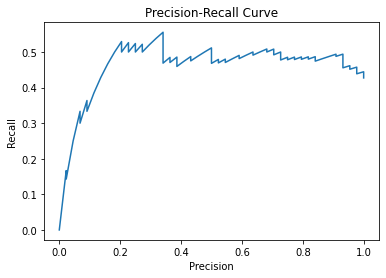

In [129]:
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.plot(atLastRecall,atLastPrecision)
plt.show()